In [ ]:
"""
標本抽出(Sampling)と信頼区間(Confidence Interval)

標本＝母集団(Population)から分析のために無作為に抽出された部分集合

# 標本抽出方法
確率抽出(Probability Sampling)＝母集団の各要素が標本に含まれている確率がゼロではない
単純無作為標本(Simple Random Sample)＝確率抽出の一種
層別抽出(Stratified Sampling)＝標本が母集団全体を代表している可能性を高めるために母集団を層に分割した上で抽出する

# 参考
https://bellcurve.jp/statistics/glossary/3538.html
"""

In [8]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5


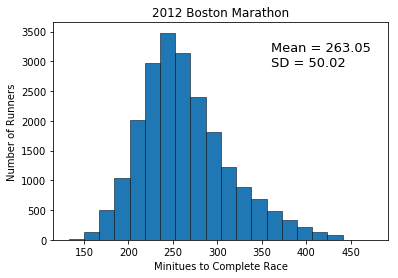

In [38]:
# マラソンの参加者全員のフィニッシュタイムのヒストグラムを作成する

import matplotlib.pylab as pylab

def getBMData(filename):
    """Read CSV File. The elements are as followes.
    0. name, 1. gender, 2. age, 3. division(run or wheelchair), 4. country, 5. time
    return value: dictionary of the 6 value's list
    """
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(',')
        data['name'].append(split[0])                                                                                                                                                                                                                 
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # remove \n
        line = f.readline()
    f.close()
    return data

def makeHist(data, bins, title, xLabel, yLabel):
    pylab.hist(
        data,
        bins,
        edgecolor='black',
        linewidth=0.5)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    mean = sum(data)/len(data)
    std = stdDev(data)
    pylab.annotate(
        'Mean = {0}\nSD = {1}'.format(
            str(round(mean, 2)), 
            str(round(std, 2))),
        fontsize=13,
        xy=(0.65, 0.8),
        xycoords = 'axes fraction')

times = getBMData('./bm_results2012.txt')['time']
makeHist(times, 20, '2012 Boston Marathon', 'Minitues to Complete Race', 'Number of Runners')
    

In [42]:
import random

def sampleTimes(times, numExamples):
    """
    times: assume as a list of float values that represent the times of every runners
    numExamples: assume as a int value
    create random sample the size of numExamples and create histgram that displays means, std devs, and distribution
    """
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size ' + str(numExamples), 'Minutes to Complete Race', 'Number of Runners')


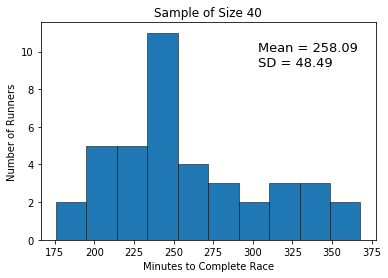

In [43]:
sampleSize = 40
sampleTimes(times, sampleSize)